In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dataset/train.csv')

In [3]:
data

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi
...,...,...
359,72.jpg,manipuri
360,253.jpg,mohiniyattam
361,404.jpg,kuchipudi
362,89.jpg,manipuri


In [4]:
data.iloc[:,1]

0           manipuri
1      bharatanatyam
2             odissi
3          kathakali
4             odissi
           ...      
359         manipuri
360     mohiniyattam
361        kuchipudi
362         manipuri
363     mohiniyattam
Name: target, Length: 364, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
data1 = label_encoder.fit_transform(data.iloc[:,1])

In [6]:
onehot_encoder = OneHotEncoder(sparse=False)
data1 = data1.reshape(-1,1)
data2 = onehot_encoder.fit_transform(data1)

In [7]:
data_hot = pd.DataFrame(data2)

In [8]:
data_out = pd.concat([data, data_hot], axis=1)

In [9]:
data_out = data_out.rename(columns={0:'bharatanatyam',1:'kathak',2:'kathakali',3:'kuchipudi',4:'manipuri',5:'mohiniyattam',6:'odissi',7:'Sattriya'})

In [10]:
data_out

,Image,target,bharatanatyam,kathak,kathakali,kuchipudi,manipuri,mohiniyattam,odissi,Sattriya
0,96.jpg,manipuri,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,163.jpg,bharatanatyam,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,450.jpg,odissi,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,219.jpg,kathakali,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,455.jpg,odissi,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
359,72.jpg,manipuri,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
360,253.jpg,mohiniyattam,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
361,404.jpg,kuchipudi,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
362,89.jpg,manipuri,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:

data_out.shape

(364, 10)

In [12]:
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data_out.shape[0])):
    path = 'dataset/train/' + data_out['Image'][i] 
    img = image.load_img( path, target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
    
X = np.array(X)

100%|████████████████████████████████████████████████████████████████████████████████| 364/364 [00:05<00:00, 72.38it/s]


In [13]:
X.shape

(364, 350, 350, 3)

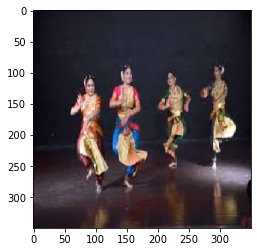

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [15]:
data_out['target'][1]

'bharatanatyam'

In [16]:
y = data_out.drop(['Image','target'], axis=1)
y = y.to_numpy()
y.shape

(364, 8)

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [18]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D

In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

## BUILD CNN

In [22]:
X_train[0].shape

(350, 350, 3)

In [23]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(8, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history =  model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Train on 309 samples, validate on 55 samples
Epoch 1/5
309/309 [==============================] - 48s 154ms/sample - loss: 0.5241 - accuracy: 0.8398 - val_loss: 0.3985 - val_accuracy: 0.8750
Epoch 2/5
309/309 [==============================] - 44s 141ms/sample - loss: 0.4347 - accuracy: 0.8507 - val_loss: 0.5920 - val_accuracy: 0.7864
Epoch 3/5
309/309 [==============================] - 44s 142ms/sample - loss: 0.4142 - accuracy: 0.8621 - val_loss: 0.7786 - val_accuracy: 0.7864
Epoch 4/5
309/309 [==============================] - 45s 145ms/sample - loss: 0.3955 - accuracy: 0.8641 - val_loss: 0.8952 - val_accuracy: 0.7864
Epoch 5/5
309/309 [==============================] - 44s 142ms/sample - loss: 0.3374 - accuracy: 0.8738 - val_loss: 0.9427 - val_accuracy: 0.7864


In [50]:
#model.save('dance-cnn.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: dance-cnn.model\assets


## Test

In [27]:
test1 = pd.read_csv('dataset/test.csv')
test1

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg
...,...
151,366.jpg
152,226.jpg
153,35.jpg
154,458.jpg


In [28]:
test1.shape[0]

156

In [34]:

for i in tqdm(range(test1.shape[0])):
    path1 = 'dataset/test/' + test1['Image'][i]
    #print(path1)
    img = image.load_img( path1 , target_size=(img_width,img_height,3))
    #plt.imshow(img)
    img = image.img_to_array(img)
    img = img/255.0
    img = img.reshape(1, img_width, img_height, 3)
    
    classes = data_out.columns[2:]
    #print(classes)
    y_prob = model.predict(img)
    print(np.exp(y_prob))
    
    
    top = np.argsort(y_prob[0])[7]
    #print(top)
    #print(f"for {i} value" , classes[top])



  3%|██▋                                                                               | 5/156 [00:00<00:07, 20.75it/s]

[[1.002721  2.4712408 1.000251  1.0046538 1.0332779 1.0011467 1.021166
  1.0333862]]
[2 5 0 3 6 4 7 1]
[[1.0022928 2.3710914 1.000233  1.0042373 1.0620217 1.0015115 1.0209424
  1.0486331]]
[2 5 0 3 6 7 4 1]
[[1.0022346 2.5291262 1.0001773 1.0050663 1.022456  1.0013161 1.0184273
  1.0231446]]
[2 5 0 3 6 4 7 1]
[[1.002745  2.459959  1.0001894 1.0046803 1.0329189 1.0012841 1.0217056
  1.0378071]]
[2 5 0 3 6 4 7 1]
[[1.0026703 2.4823332 1.0002024 1.0066118 1.0276693 1.001098  1.0221127
  1.0315672]]
[2 5 0 3 6 4 7 1]


  5%|████▏                                                                             | 8/156 [00:00<00:07, 20.99it/s]

[[1.0023793 2.4792404 1.000197  1.0054404 1.0344695 1.0010496 1.0182447
  1.0315171]]
[2 5 0 3 6 7 4 1]
[[1.0026066 2.4799738 1.0002002 1.0055124 1.0306957 1.0011187 1.0207042
  1.0321115]]
[2 5 0 3 6 4 7 1]
[[1.000983  2.527219  1.0001718 1.0025184 1.0304724 1.0009924 1.017907
  1.0206637]]
[2 0 5 3 6 7 4 1]
[[1.0012037 2.535192  1.0001465 1.0027859 1.0274565 1.0008467 1.0156004
  1.0224345]]
[2 5 0 3 6 7 4 1]
[[1.0029644 2.4742956 1.0002156 1.0065715 1.0279917 1.0011023 1.0239587
  1.032449 ]]
[2 5 0 3 6 4 7 1]


  9%|███████▎                                                                         | 14/156 [00:00<00:06, 22.03it/s]

[[1.0020949 2.419415  1.0002347 1.00537   1.0518168 1.0012689 1.0183289
  1.0396053]]
[2 5 0 3 6 7 4 1]
[[1.0029738 2.490866  1.0001947 1.0045031 1.0270109 1.0013219 1.0211524
  1.0312867]]
[2 5 0 3 6 4 7 1]
[[1.0016894 2.525162  1.0001808 1.004309  1.0246688 1.0010059 1.0185187
  1.0240877]]
[2 5 0 3 6 7 4 1]
[[1.0012842 2.5110002 1.0001732 1.0034996 1.0300163 1.0010496 1.0179821
  1.0262617]]
[2 5 0 3 6 7 4 1]
[[1.0020813 2.4853091 1.0001911 1.0055836 1.032646  1.0010158 1.0198191
  1.0294241]]
[2 5 0 3 6 7 4 1]


 13%|██████████▍                                                                      | 20/156 [00:00<00:06, 21.05it/s]

[[1.0000741 2.6572804 1.0000339 1.0011408 1.0057347 1.0002135 1.0102803
  1.005303 ]]
[2 0 5 3 7 4 6 1]
[[1.0020561 2.4965022 1.0001719 1.0038484 1.0291178 1.0012028 1.0198599
  1.0299119]]
[2 5 0 3 6 4 7 1]
[[1.0000546 2.6474693 1.0000314 1.0011655 1.0073028 1.0002148 1.0105096
  1.0072252]]
[2 0 5 3 7 4 6 1]
[[1.0005778 2.5432765 1.0000943 1.0019662 1.0275923 1.0006708 1.0168602
  1.0194892]]
[2 0 5 3 6 7 4 1]
[[1.0016019 2.5134788 1.0001675 1.0029659 1.0289111 1.0008373 1.018944
  1.0258255]]
[2 5 0 3 6 7 4 1]


 15%|███████████▉                                                                     | 23/156 [00:01<00:06, 21.23it/s]

[[1.0007921 2.5914903 1.0001132 1.0025883 1.0170745 1.0006579 1.0134507
  1.0134169]]
[2 5 0 3 7 6 4 1]
[[1.0011971 2.5229704 1.000168  1.0035373 1.028669  1.0013324 1.0181247
  1.0223542]]
[2 0 5 3 6 7 4 1]
[[1.0025762 2.452636  1.0002252 1.0044798 1.0402281 1.0011792 1.020268
  1.0355006]]
[2 5 0 3 6 7 4 1]
[[1.0002697 2.6357496 1.0000746 1.0017089 1.0104403 1.0004191 1.0111516
  1.0069094]]
[2 0 5 3 7 4 6 1]
[[1.0000207 2.647098  1.0000235 1.0009512 1.0079516 1.0001568 1.0096433
  1.007898 ]]
[0 2 5 3 7 4 6 1]


 19%|███████████████                                                                  | 29/156 [00:01<00:06, 20.27it/s]

[[1.0019374 2.46767   1.000192  1.0042237 1.0382329 1.0012822 1.0190449
  1.0332571]]
[2 5 0 3 6 7 4 1]
[[1.0019715 2.5064328 1.0001556 1.003426  1.0310094 1.0010386 1.0194952
  1.0250181]]
[2 5 0 3 6 7 4 1]
[[1.0026531 2.4595675 1.0002214 1.0052484 1.0321889 1.0013775 1.0228251
  1.0369483]]
[2 5 0 3 6 4 7 1]
[[1.0026926 2.5318623 1.0001832 1.0042646 1.0221812 1.0010217 1.0240653
  1.0173254]]
[2 5 0 3 7 4 6 1]


 22%|█████████████████▋                                                               | 34/156 [00:01<00:06, 19.46it/s]

[[1.0026155 2.4515946 1.0002071 1.0055294 1.0383449 1.0011028 1.0215122
  1.0355306]]
[2 5 0 3 6 7 4 1]
[[1.0012236 2.4613626 1.0001572 1.0035567 1.043241  1.0011712 1.0191244
  1.0324222]]
[2 5 0 3 6 7 4 1]
[[1.0024494 2.5041893 1.0002035 1.0051221 1.024928  1.0010222 1.0214486
  1.0277894]]
[2 5 0 3 6 4 7 1]
[[1.0028167 2.4517772 1.0002112 1.0060158 1.0373591 1.0012599 1.0211624
  1.0359163]]
[2 5 0 3 6 7 4 1]
[[1.002709  2.459133  1.000252  1.0062203 1.0350542 1.0012915 1.021237
  1.0348678]]
[2 5 0 3 6 7 4 1]


 24%|███████████████████▏                                                             | 37/156 [00:01<00:06, 19.66it/s]

[[1.0021267 2.4819613 1.0001802 1.0045174 1.0318401 1.0011853 1.020162
  1.0321554]]
[2 5 0 3 6 4 7 1]
[[1.0005826 2.6199622 1.00009   1.0019863 1.0115337 1.0005709 1.0124685
  1.0098013]]
[2 5 0 3 7 4 6 1]
[[1.003822  2.4609761 1.0002028 1.0059626 1.0259888 1.0015857 1.026052
  1.0371948]]
[2 5 0 3 4 6 7 1]
[[1.001065  2.5750575 1.0001128 1.0030824 1.0180436 1.0006784 1.0153447
  1.0162143]]
[2 5 0 3 6 7 4 1]
[[1.0027156 2.4428823 1.0002066 1.0057092 1.0412525 1.0012786 1.0201994
  1.0371844]]
[2 5 0 3 6 7 4 1]


 28%|██████████████████████▎                                                          | 43/156 [00:02<00:05, 20.79it/s]

[[1.0013195 2.5235596 1.0001874 1.0033541 1.0304264 1.0011213 1.0172898
  1.0214669]]
[2 5 0 3 6 7 4 1]
[[1.0020654 2.504376  1.0001465 1.0040827 1.0255662 1.0010687 1.0205528
  1.029444 ]]
[2 5 0 3 6 4 7 1]
[[1.0014445 2.5311604 1.0001546 1.0042139 1.0249125 1.0008577 1.0160716
  1.0244039]]
[2 5 0 3 6 7 4 1]
[[1.0036365 2.4415946 1.0002868 1.007412  1.0344771 1.0013163 1.0237598
  1.0380603]]
[2 5 0 3 6 4 7 1]
[[1.0025418 2.4608223 1.0002089 1.0036274 1.0403609 1.0013783 1.0182056
  1.0347389]]
[2 5 0 3 6 7 4 1]


 31%|█████████████████████████▍                                                       | 49/156 [00:02<00:04, 21.47it/s]

[[1.0014248 2.4379363 1.0001807 1.0036124 1.0467606 1.0014607 1.0173584
  1.0400497]]
[2 0 5 3 6 7 4 1]
[[1.0014544 2.5440416 1.0001792 1.0039374 1.0228488 1.0010129 1.0176792
  1.0197474]]
[2 5 0 3 6 7 4 1]
[[1.0000709 2.6385446 1.0000346 1.0011785 1.0093342 1.0002861 1.0114465
  1.0075593]]
[2 0 5 3 7 4 6 1]
[[1.001828  2.408266  1.0001805 1.0040923 1.0518975 1.0012697 1.019789
  1.0445037]]
[2 5 0 3 6 7 4 1]
[[1.0004264 2.6247652 1.0000885 1.0023785 1.0113299 1.0006016 1.0119575
  1.008399 ]]
[2 0 5 3 7 4 6 1]


 33%|███████████████████████████                                                      | 52/156 [00:02<00:04, 21.78it/s]

[[1.0028393 2.4555366 1.0002036 1.0054843 1.0332235 1.0010548 1.0229625
  1.0373878]]
[2 5 0 3 6 4 7 1]
[[1.0021023 2.482302  1.0001804 1.004523  1.031945  1.0011826 1.0202048
  1.0318875]]
[2 5 0 3 6 7 4 1]
[[1.0024182 2.4136562 1.0002428 1.0045747 1.0487251 1.0015819 1.0214218
  1.0421476]]
[2 5 0 3 6 7 4 1]
[[1.0008627 2.5714524 1.0001075 1.0032357 1.019047  1.0008011 1.0153149
  1.0165974]]
[2 5 0 3 6 7 4 1]
[[1.0011767 2.535446  1.0001484 1.0027435 1.0275767 1.0008663 1.0154581
  1.0224046]]
[2 5 0 3 6 7 4 1]


 37%|██████████████████████████████                                                   | 58/156 [00:02<00:04, 21.95it/s]

[[1.0007825 2.5836031 1.0001324 1.0022385 1.0196623 1.0006897 1.0123832
  1.0153123]]
[2 5 0 3 6 7 4 1]
[[1.0026816 2.3863645 1.0002512 1.0052742 1.0535764 1.0015415 1.0199556
  1.0497472]]
[2 5 0 3 6 7 4 1]
[[1.0001752 2.6405132 1.0000459 1.0015445 1.0100236 1.0003263 1.009343
  1.0076921]]
[2 0 5 3 7 6 4 1]
[[1.002695  2.4821396 1.0002273 1.0065985 1.029697  1.001086  1.0212357
  1.0304754]]
[2 5 0 3 6 4 7 1]
[[1.0026127 2.4908748 1.0002103 1.0058885 1.0259329 1.0011908 1.0218517
  1.0307292]]
[2 5 0 3 6 4 7 1]


 41%|█████████████████████████████████▏                                               | 64/156 [00:03<00:04, 22.32it/s]

[[1.0029047 2.42497   1.0002313 1.004583  1.0413321 1.0015746 1.019403
  1.0462217]]
[2 5 0 3 6 4 7 1]
[[1.0002308 2.61466   1.0000595 1.0014861 1.0147387 1.0004079 1.0117116
  1.0104625]]
[2 0 5 3 7 6 4 1]
[[1.0022863 2.4639132 1.0001849 1.0038097 1.0344137 1.0011663 1.0207766
  1.0370852]]
[2 5 0 3 6 4 7 1]
[[1.0033616 2.44587   1.0002327 1.0059378 1.0386848 1.0013597 1.019713
  1.0379577]]
[2 5 0 3 6 7 4 1]
[[1.003031  2.4920573 1.0002036 1.0049517 1.0230116 1.0014237 1.0236684
  1.0316461]]
[2 5 0 3 4 6 7 1]


 43%|██████████████████████████████████▊                                              | 67/156 [00:03<00:04, 22.03it/s]

[[1.0027913 2.477378  1.0002236 1.0058192 1.0318558 1.0012039 1.021083
  1.0310317]]
[2 5 0 3 6 7 4 1]
[[1.0013837 2.5663137 1.0001832 1.00373   1.019651  1.0008326 1.0152684
  1.0169365]]
[2 5 0 3 6 7 4 1]
[[1.0007008 2.5520763 1.0001237 1.0026301 1.022819  1.000966  1.0166491
  1.0197952]]
[2 0 5 3 6 7 4 1]
[[1.003156  2.462053  1.0002522 1.0070105 1.0319413 1.0012448 1.0229735
  1.0337734]]
[2 5 0 3 6 4 7 1]
[[1.0013402 2.5338671 1.0001215 1.0036925 1.0231174 1.0007749 1.0170176
  1.0249088]]
[2 5 0 3 6 4 7 1]


 47%|█████████████████████████████████████▉                                           | 73/156 [00:03<00:03, 22.03it/s]

[[1.00039   2.6356852 1.0000701 1.0017192 1.0098683 1.0004447 1.010947
  1.0075555]]
[2 0 5 3 7 4 6 1]
[[1.0012084 2.565956  1.0001668 1.0028977 1.0207459 1.00071   1.0161488
  1.0162687]]
[2 5 0 3 6 7 4 1]
[[1.0000312 2.6463902 1.0000274 1.0011165 1.0073149 1.000191  1.0106045
  1.0076299]]
[2 0 5 3 4 7 6 1]
[[1.0017896 2.4653986 1.000202  1.0043747 1.039766  1.0012933 1.0174617
  1.0342665]]
[2 5 0 3 6 7 4 1]
[[1.0025144 2.4619055 1.0002033 1.0045447 1.0355767 1.0012938 1.0205889
  1.0358107]]
[2 5 0 3 6 4 7 1]


 51%|█████████████████████████████████████████                                        | 79/156 [00:03<00:03, 21.46it/s]

[[1.0022506 2.5222902 1.0002034 1.0053297 1.0233669 1.0010393 1.0184714
  1.0249318]]
[2 5 0 3 6 4 7 1]
[[1.0014561 2.5098288 1.0002123 1.0031363 1.0313987 1.0012977 1.0174903
  1.0257614]]
[2 5 0 3 6 7 4 1]
[[1.0021331 2.4897227 1.0001777 1.0041474 1.0326359 1.0010525 1.0184561
  1.0303793]]
[2 5 0 3 6 7 4 1]
[[1.0033915 2.4652016 1.0002159 1.0050861 1.032751  1.0014381 1.0222702
  1.0339253]]
[2 5 0 3 6 4 7 1]
[[1.0015824 2.5034335 1.0001795 1.0037833 1.0280644 1.0011904 1.0191345
  1.0294027]]
[2 5 0 3 6 4 7 1]


 53%|██████████████████████████████████████████▌                                      | 82/156 [00:03<00:03, 21.94it/s]

[[1.0000327 2.6563914 1.0000305 1.0010438 1.0062951 1.0001802 1.0095149
  1.0060176]]
[2 0 5 3 7 4 6 1]
[[1.0001593 2.638945  1.0000734 1.0015305 1.0107713 1.000423  1.0091443
  1.0076483]]
[2 0 5 3 7 6 4 1]
[[1.0026121 2.4401171 1.0001756 1.0053133 1.0378226 1.0010889 1.0225272
  1.040166 ]]
[2 5 0 3 6 4 7 1]
[[1.0024397 2.4550996 1.0002142 1.0045533 1.0382988 1.0012965 1.0200607
  1.0365493]]
[2 5 0 3 6 7 4 1]
[[1.0032963 2.468286  1.0002522 1.0068299 1.0282049 1.0014248 1.0245564
  1.0331664]]
[2 5 0 3 6 4 7 1]


 56%|█████████████████████████████████████████████▋                                   | 88/156 [00:04<00:03, 21.92it/s]

[[1.0026658 2.4799976 1.0002061 1.0053315 1.0312029 1.0011322 1.0212094
  1.031188 ]]
[2 5 0 3 6 7 4 1]
[[1.0004879 2.5997558 1.0000817 1.0023354 1.0146754 1.0004258 1.0142261
  1.0126392]]
[2 5 0 3 7 6 4 1]
[[1.0020831 2.4891293 1.0001913 1.0038649 1.0295808 1.0012553 1.0212924
  1.030931 ]]
[2 5 0 3 6 4 7 1]
[[1.0029508 2.479061  1.0002313 1.006191  1.0296918 1.0011517 1.0217686
  1.0313048]]
[2 5 0 3 6 4 7 1]
[[1.000477  2.563185  1.0001101 1.0024359 1.0245756 1.0007523 1.0147517
  1.0161848]]
[2 0 5 3 6 7 4 1]


 60%|████████████████████████████████████████████████▊                                | 94/156 [00:04<00:02, 22.66it/s]

[[1.0010386 2.5522864 1.0001405 1.0034517 1.0239905 1.0010021 1.0140309
  1.0199399]]
[2 5 0 3 6 7 4 1]
[[1.0010822 2.5557048 1.000125  1.002561  1.0223106 1.000902  1.0161263
  1.0191234]]
[2 5 0 3 6 7 4 1]
[[1.001079  2.5762703 1.0001402 1.0028338 1.0179073 1.000809  1.0149966
  1.0162975]]
[2 5 0 3 6 7 4 1]
[[1.0031701 2.42952   1.0002282 1.0071023 1.0339911 1.0012841 1.0264366
  1.0418868]]
[2 5 0 3 6 4 7 1]
[[1.0026941 2.4823296 1.0002187 1.0060923 1.0276408 1.0010015 1.0223031
  1.0319959]]
[2 5 0 3 6 4 7 1]


 62%|██████████████████████████████████████████████████▎                              | 97/156 [00:04<00:03, 17.73it/s]

[[1.003273  2.4876382 1.0002108 1.00494   1.0265244 1.0014277 1.0223874
  1.0309844]]
[2 5 0 3 6 4 7 1]
[[1.000031  2.653253  1.000027  1.0010538 1.0072114 1.0001698 1.0095481
  1.0062639]]
[2 0 5 3 7 4 6 1]
[[1.0024308 2.4635935 1.0001929 1.0052582 1.0330582 1.0010688 1.0217334
  1.0360564]]
[2 5 0 3 6 4 7 1]


 64%|███████████████████████████████████████████████████▎                            | 100/156 [00:04<00:02, 19.01it/s]

[[1.0009438 2.5338435 1.0001451 1.0024954 1.0279051 1.0011216 1.0169058
  1.0215014]]
[2 0 5 3 6 7 4 1]
[[1.0020549 2.5246694 1.0001897 1.0043411 1.0244709 1.0010487 1.0200756
  1.0224632]]
[2 5 0 3 6 7 4 1]
[[1.0023553 2.5030913 1.0002172 1.0060443 1.0232023 1.0014864 1.0209754
  1.0291123]]
[2 5 0 3 6 4 7 1]
[[1.0005056 2.6153653 1.0000812 1.0026426 1.009851  1.0005803 1.0158609
  1.0092943]]
[2 0 5 3 7 4 6 1]
[[1.0022992 2.4284163 1.0002578 1.0045072 1.0464104 1.0017532 1.0179574
  1.0416372]]
[2 5 0 3 6 7 4 1]


 68%|██████████████████████████████████████████████████████▎                         | 106/156 [00:05<00:02, 20.46it/s]

[[1.0029697 2.4839237 1.0002395 1.0064456 1.0264137 1.0010852 1.0228515
  1.0312598]]
[2 5 0 3 6 4 7 1]
[[1.0015919 2.5349252 1.0001539 1.0031166 1.0238827 1.0011286 1.0194403
  1.0212177]]
[2 5 0 3 6 7 4 1]
[[1.0001211 2.6487093 1.0000407 1.0013779 1.007807  1.0002844 1.0095118
  1.0068843]]
[2 0 5 3 7 4 6 1]
[[1.0011948 2.5493135 1.0001358 1.0029083 1.0244216 1.0008985 1.0151466
  1.0200816]]
[2 5 0 3 6 7 4 1]
[[1.0024309 2.4537737 1.0002083 1.0043979 1.039798  1.0011566 1.0203668
  1.0356238]]
[2 5 0 3 6 7 4 1]


 72%|█████████████████████████████████████████████████████████▍                      | 112/156 [00:05<00:02, 21.50it/s]

[[1.0016783 2.5392659 1.0001423 1.003467  1.0203103 1.0011284 1.0192802
  1.0227687]]
[2 5 0 3 6 4 7 1]
[[1.0011455 2.5254219 1.0001452 1.002872  1.0287288 1.0009372 1.0182354
  1.0223483]]
[2 5 0 3 6 7 4 1]
[[1.0029156 2.477774  1.0002146 1.0065016 1.0278922 1.0011132 1.0231676
  1.0320084]]
[2 5 0 3 6 4 7 1]
[[1.0017611 2.515315  1.0001508 1.003969  1.0236431 1.001127  1.0199949
  1.0278184]]
[2 5 0 3 6 4 7 1]
[[1.0010228 2.503217  1.0001526 1.0029238 1.0318596 1.001201  1.0191307
  1.0271786]]
[2 0 5 3 6 7 4 1]


 74%|██████████████████████████████████████████████████████████▉                     | 115/156 [00:05<00:01, 21.43it/s]

[[1.0035579 2.4417765 1.0002315 1.0058984 1.035366  1.0012689 1.0244046
  1.0381864]]
[2 5 0 3 6 4 7 1]
[[1.0041417 2.4497795 1.0002282 1.0064095 1.0311362 1.0014321 1.0276781
  1.034437 ]]
[2 5 0 3 6 4 7 1]
[[1.001561  2.5562024 1.0001466 1.0036951 1.0192341 1.0009785 1.0174985
  1.0188818]]
[2 5 0 3 6 7 4 1]
[[1.0026171 2.509488  1.0002257 1.004327  1.0250617 1.0013429 1.0199428
  1.0272886]]
[2 5 0 3 6 4 7 1]
[[1.0012712 2.5216744 1.000165  1.0034835 1.0283774 1.0013372 1.0183259
  1.0229448]]
[2 0 5 3 6 7 4 1]


 78%|██████████████████████████████████████████████████████████████                  | 121/156 [00:05<00:01, 22.05it/s]

[[1.000998  2.578489  1.0001459 1.0030404 1.0181694 1.0008522 1.0163057
  1.0136775]]
[2 5 0 3 7 6 4 1]
[[1.0020511 2.4274924 1.0002253 1.0053363 1.0498624 1.0012261 1.0183936
  1.0381433]]
[2 5 0 3 6 7 4 1]
[[1.0023643 2.4943    1.0001874 1.0046933 1.0266328 1.0011352 1.0205282
  1.0315076]]
[2 5 0 3 6 4 7 1]
[[1.0028878 2.4658964 1.000219  1.0057719 1.0320485 1.0011277 1.0215024
  1.0352464]]
[2 5 0 3 6 4 7 1]
[[1.0012943 2.520662  1.0001911 1.0034038 1.031125  1.0011481 1.0172255
  1.0219567]]
[2 5 0 3 6 7 4 1]


 81%|█████████████████████████████████████████████████████████████████▏              | 127/156 [00:05<00:01, 22.25it/s]

[[1.000234  2.6487465 1.000062  1.0014296 1.0079838 1.0004246 1.0099387
  1.0059403]]
[2 0 5 3 7 4 6 1]
[[1.0035685 2.443782  1.0002447 1.00525   1.0340533 1.001723  1.022062
  1.0412064]]
[2 5 0 3 6 4 7 1]
[[1.0028487 2.46152   1.0001932 1.0041671 1.034194  1.0013661 1.0226613
  1.0352352]]
[2 5 0 3 6 4 7 1]
[[1.0006816 2.5538752 1.0001216 1.0023304 1.0254664 1.0007433 1.0145497
  1.0191022]]
[2 0 5 3 6 7 4 1]
[[1.0008733 2.5723193 1.0001007 1.0029098 1.0184515 1.00061   1.0157394
  1.0169449]]
[2 5 0 3 6 7 4 1]


 83%|██████████████████████████████████████████████████████████████████▋             | 130/156 [00:06<00:01, 22.46it/s]

[[1.0014116 2.503395  1.0001545 1.0032009 1.0314598 1.0010952 1.018272
  1.0277936]]
[2 5 0 3 6 7 4 1]
[[1.0035762 2.4453635 1.0002769 1.0072632 1.0333899 1.0012879 1.0239301
  1.0376334]]
[2 5 0 3 6 4 7 1]
[[1.0000226 2.6502104 1.0000235 1.0009006 1.0080734 1.0001762 1.0087754
  1.0074884]]
[0 2 5 3 7 4 6 1]
[[1.0015259 2.5364304 1.0001632 1.0032513 1.0244023 1.0009297 1.0182861
  1.0213739]]
[2 5 0 3 6 7 4 1]
[[1.0013059 2.4637136 1.0001525 1.0035359 1.0419976 1.0011331 1.0192841
  1.0324869]]
[2 5 0 3 6 7 4 1]


 87%|█████████████████████████████████████████████████████████████████████▋          | 136/156 [00:06<00:00, 22.42it/s]

[[1.0023057 2.4751642 1.0001739 1.0039293 1.0341967 1.0009989 1.0210801
  1.0323216]]
[2 5 0 3 6 7 4 1]
[[1.0062369 2.404279  1.000305  1.0060368 1.0321244 1.0021245 1.02811
  1.0499526]]
[2 5 3 0 6 4 7 1]
[[1.0001464 2.6431835 1.0000434 1.0013009 1.0093082 1.0002806 1.0092223
  1.0078309]]
[2 0 5 3 7 6 4 1]
[[1.0009943 2.5128305 1.0001566 1.0025699 1.0360867 1.0010246 1.0148159
  1.0239738]]
[2 0 5 3 6 7 4 1]
[[1.001663  2.5397756 1.0001417 1.0034473 1.0205537 1.0011257 1.0188577
  1.0227826]]
[2 5 0 3 6 4 7 1]


 91%|████████████████████████████████████████████████████████████████████████▊       | 142/156 [00:06<00:00, 22.28it/s]

[[1.0011618 2.503651  1.000129  1.0034171 1.0322928 1.0010258 1.0163908
  1.0288926]]
[2 5 0 3 6 7 4 1]
[[1.0000689 2.6513128 1.0000367 1.0012009 1.0073829 1.0002027 1.0095577
  1.0065901]]
[2 0 5 3 7 4 6 1]
[[1.0021392 2.461541  1.0001941 1.0052788 1.0336214 1.001125  1.0230106
  1.0352819]]
[2 5 0 3 6 4 7 1]
[[1.0009395 2.5715125 1.0001194 1.0026013 1.0180174 1.0007616 1.0184361
  1.0150753]]
[2 5 0 3 7 4 6 1]
[[1.0039418 2.4508502 1.000254  1.0073532 1.0295227 1.0013009 1.0252157
  1.0374359]]
[2 5 0 3 6 4 7 1]


 93%|██████████████████████████████████████████████████████████████████████████▎     | 145/156 [00:06<00:00, 22.13it/s]

[[1.0014324 2.5015795 1.0001678 1.002726  1.0343796 1.0009679 1.0189307
  1.0255543]]
[2 5 0 3 6 7 4 1]
[[1.0025042 2.4734707 1.0002087 1.0036513 1.0329888 1.0014608 1.0197176
  1.0351862]]
[2 5 0 3 6 4 7 1]
[[1.002242  2.4932256 1.0002117 1.0052047 1.032625  1.0009608 1.0189602
  1.027299 ]]
[2 5 0 3 6 7 4 1]
[[1.0012583 2.5314665 1.000164  1.003658  1.0242189 1.0012257 1.0170418
  1.0243671]]
[2 5 0 3 6 4 7 1]
[[1.0022149 2.4950209 1.0002071 1.0051894 1.0321683 1.0009574 1.0190665
  1.0269588]]
[2 5 0 3 6 7 4 1]


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 151/156 [00:07<00:00, 22.41it/s]

[[1.0012808 2.4927065 1.0001366 1.0032847 1.0330883 1.0010171 1.0182284
  1.0307653]]
[2 5 0 3 6 7 4 1]
[[1.0019919 2.49257   1.0001776 1.0050097 1.0308981 1.0010557 1.0184325
  1.0302186]]
[2 5 0 3 6 7 4 1]
[[1.002391  2.524806  1.0001756 1.0051202 1.0227402 1.0013179 1.0190299
  1.0237899]]
[2 5 0 3 6 4 7 1]
[[1.0023451 2.3723874 1.0002286 1.0042334 1.0610267 1.0014635 1.021037
  1.04895  ]]
[2 5 0 3 6 7 4 1]
[[1.0019852 2.4886734 1.0001854 1.003967  1.0358021 1.0012455 1.0188087
  1.0274372]]
[2 5 0 3 6 7 4 1]


100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:07<00:00, 21.44it/s]

[[1.0002452 2.6053472 1.0001072 1.001818  1.016599  1.0006684 1.0133407
  1.0099311]]
[2 0 5 3 7 6 4 1]
[[1.0012599 2.4786828 1.000159  1.0043879 1.0339408 1.0011014 1.0195483
  1.033177 ]]
[2 5 0 3 6 7 4 1]
[[1.0020788 2.4709377 1.0002247 1.0042188 1.0401628 1.0011942 1.0192348
  1.0297005]]
[2 5 0 3 6 7 4 1]
[[1.0016872 2.476615  1.0001951 1.0040357 1.0358096 1.0012951 1.0181937
  1.0332314]]
[2 5 0 3 6 7 4 1]
